In [66]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")


from sklearn.model_selection import train_test_split

In [67]:
# load the clustering data into a numpy array

clusters = np.loadtxt('pathname.txt').astype(int)


In [68]:
# load the dataframe with all the mid data

data = pd.read_csv('../Feature Extraction/midFeaturesAll.csv')

In [69]:
data_train, data_test = train_test_split(data.copy(),
                                   shuffle=True,
                                   random_state=608,
                                   stratify=data.Emotion,
                                   test_size=0.2
                                   )

In [70]:
data_train['Cluster'] = clusters

In [71]:
# What are the proportions of different emotions in the different clusters?

for c in range(6):
    df = data_train.loc[data_train.Cluster == c]
    emo_vals = df.Emotion.value_counts(normalize=True, sort=False)
    print('The data in cluster ', c, ' have the following emotional frequencies:')
    print(emo_vals)




The data in cluster  0  have the following emotional frequencies:
ANG    0.161983
SAD    0.173554
HAP    0.183471
NEU    0.147107
FEA    0.173554
DIS    0.160331
Name: Emotion, dtype: float64
The data in cluster  1  have the following emotional frequencies:
DIS    0.181265
SAD    0.181265
FEA    0.161800
HAP    0.194647
ANG    0.144769
NEU    0.136253
Name: Emotion, dtype: float64
The data in cluster  2  have the following emotional frequencies:
NEU    0.145455
FEA    0.187879
SAD    0.180303
ANG    0.177273
HAP    0.150000
DIS    0.159091
Name: Emotion, dtype: float64
The data in cluster  3  have the following emotional frequencies:
NEU    0.154610
DIS    0.165248
FEA    0.147518
HAP    0.171631
ANG    0.188652
SAD    0.172340
Name: Emotion, dtype: float64
The data in cluster  4  have the following emotional frequencies:
ANG    0.158658
DIS    0.172257
HAP    0.168631
FEA    0.183137
SAD    0.155032
NEU    0.162285
Name: Emotion, dtype: float64
The data in cluster  5  have the followi

In [72]:
# Get a list L of dicts, where each dict has type emo:freq for one of the clusters


L = []

for c in range(6):
    df = data_train.loc[data_train.Cluster == c]
    emo_vals = df.Emotion.value_counts(normalize=True, sort=False)
    dict = emo_vals.to_dict()
    L.append(dict)
    

    

In [73]:
# Get a list L_emo_clusters_ordered, with entries lists of emo freqs for the clusters, 
# where emotions are ordered the same


emotions = ['ANG', 'SAD', 'HAP', 'NEU', 'FEA', 'DIS']

L_emo_clusters_ordered = []

for c in range(6):
    list = []
    for emo in emotions:
        freq = L[c][emo]
        list.append(freq)
    L_emo_clusters_ordered.append(list)



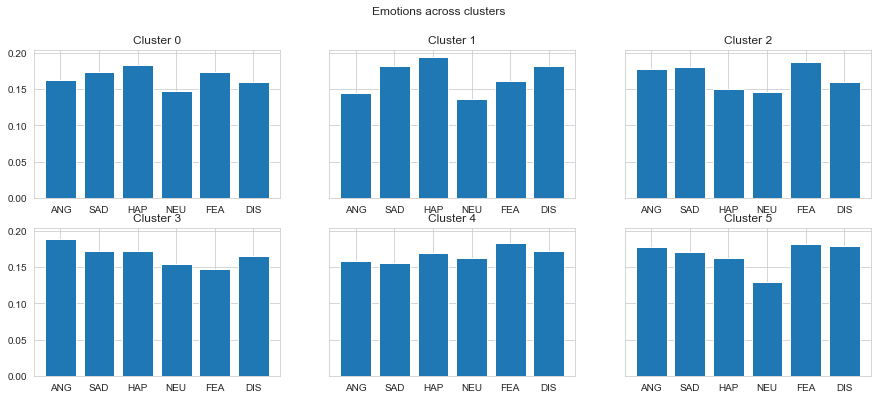

In [74]:
# Plot emotional frequency in each cluster as a bar chart


fig, axes = plt.subplots(2, 3, figsize = (15,6), sharey=True)
fig.suptitle('Emotions across clusters')


axes[0, 0].bar(emotions, L_emo_clusters_ordered[0])
axes[0, 0].set_title('Cluster 0')

axes[0, 1].bar(emotions, L_emo_clusters_ordered[1])
axes[0, 1].set_title('Cluster 1')

axes[0, 2].bar(emotions, L_emo_clusters_ordered[2])
axes[0, 2].set_title('Cluster 2')

axes[1, 0].bar(emotions, L_emo_clusters_ordered[3])
axes[1, 0].set_title('Cluster 3')

axes[1, 1].bar(emotions, L_emo_clusters_ordered[4])
axes[1, 1].set_title('Cluster 4')

axes[1, 2].bar(emotions, L_emo_clusters_ordered[5])
axes[1, 2].set_title('Cluster 5')

plt.show()

